In [305]:
import numpy as np
import matplotlib.pyplot as plt

## TASK-1

In [306]:
class KDE:
    def __init__(self,kernel):
        self.kernel=kernel
    def fit(self,data):
        self.data_dim=len(data.shape)
        self.data=data
        n=data.shape[0]
        d=self.data_dim
        if self.data_dim==1:
            std_dev = np.std(data)
            h = (4 * std_dev ** 5 / (3 * n)) ** (1/5)
        else:
            cov_matrix = np.cov(data, rowvar=False)
            h = (4 / ((d + 2) * n)) ** (1 / (d + 4)) * np.linalg.det(cov_matrix) ** (1 / (d + 4))
        self.bandwidth=h
    def pseudo_log_likelihood(self):
        lst=np.linspace(0.1,1,2)
        best_score=-np.inf
        best_bandwidth=None
        for bandwidth in lst:
            total_prob=0
            self.bandwidth=bandwidth
            for _ in self.data:
                total_prob+=np.sum(self.score_samples(self.data))
                if self.kernel=='gaussian':
                    total_prob-=(1/((2*np.pi)**(self.data_dim*0.5)))
                elif self.kernel=='box':
                    total_prob-=1          
            avg_score=total_prob/len(self.data.shape)
            if avg_score > best_score:
                best_score = avg_score
                best_bandwidth = bandwidth
        return best_bandwidth
    def gaussian_score(self,x):
        return (1/((2*np.pi)**(self.data_dim*0.5)))*np.exp(-0.5*np.sum(np.square(x)))
    def box_score(self,x):
        y=np.abs(x)<1/2
        y=y.astype(int)
        if self.data_dim==1 and y==1:
            return 1
        elif self.data_dim!=1 and np.sum(y)==x.shape[0]:
            return 1
        return 0
    def triangle_score(self,x):
        prob=((-2*x)/self.bandwidth)+1
        prob=np.where(x>=self.bandwidth/2,0,prob)
        return np.prod(prob)
    def kernel_score(self,p):
        if self.kernel=='gaussian':
            score=0
            for x in self.data:
                score+=self.gaussian_score((p-x)/self.bandwidth)
            return score
        elif self.kernel=='box':
            score=0
            for x in self.data:
                score+=self.box_score((p-x)/self.bandwidth)
            return score
        else:
            score=0
            for x in self.data:
                score+=self.triangle_score(abs(p-x)/self.bandwidth)
            return score
    def score_samples(self,testdata):
        ans=[]
        for point in testdata:
            ans.append(self.kernel_score(point)/(self.data.shape[0]*(self.bandwidth**self.data_dim)))
        return ans
    def visualise(self,dt,den):
        if self.data_dim>2:
            return
        if self.data_dim==1:
            sorted_indices = np.argsort(dt)
            den=np.array(den)
            sorted_points = dt[sorted_indices]
            sorted_probabilities = den[sorted_indices]
            plt.figure(figsize=(8, 6))
            plt.scatter(sorted_points.tolist(), [0]*len(sorted_points.tolist()))
            plt.plot(sorted_points.tolist(), sorted_probabilities.tolist(),marker='x')
            plt.xlabel('Samples')
            plt.ylabel('Density')
            plt.title('Samples with Corresponding Densities')
            plt.show()
        else:
            den=np.array(den)
            x = np.linspace(min(dt[:, 0]), max(dt[:, 0]), 100)
            y = np.linspace(min(dt[:, 1]), max(dt[:, 1]), 100)
            X, Y = np.meshgrid(x, y)
            Z = np.zeros_like(X)
            for i in range(len(dt)):
                Z += den[i] * np.exp(-((X - dt[i, 0])**2 + (Y - dt[i, 1])**2))
            plt.contourf(X, Y, Z, cmap='viridis')
            plt.colorbar()
            plt.scatter(dt[:, 0], dt[:, 1], c=den, cmap='viridis', edgecolors='black')
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.title('Heatmap of density for each point')
            plt.show()

[0.07228411947974503, 0.05179334002348614, 0.06162584861186357, 0.029354180893047217, 0.04372342935172322, 0.022165201268807964, 0.027904514796923414, 0.08166418255933856, 0.03863253682478062, 0.06190551848600876, 0.05575132092023509, 0.01782692532842121, 0.04868044913022955, 0.05634894577288661, 0.055551227815945986, 0.01780221478572319, 0.07418980075085431, 0.053337190849865594, 0.012648789054221515, 0.028697791467765067, 0.04505849484374211, 0.031221104888966244, 0.019787892798650432, 0.03507027385857072, 0.022403899037273065, 0.07760046036627863, 0.05026069096715201, 0.0757516490609757, 0.07497242750179979, 0.009000663697291732, 0.04088000553096057, 0.0765998864404492, 0.06049188774967279, 0.008422950192077856, 0.012618875427101517, 0.031248118516982004, 0.0357948451219124, 0.07386622729347973, 0.05159144296611696, 0.05102637868402328, 0.07096919784902486, 0.04122787279739635, 0.06931392790497783, 0.03780123728855113, 0.0315254078214574, 0.046420302836259864, 0.07145222818627218, 0

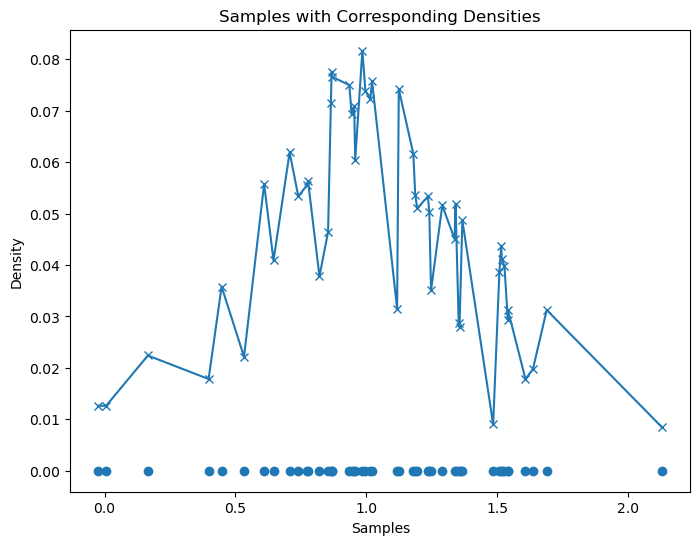

In [307]:
# train_data=np.linspace(1,5,1000)
# test_data=np.linspace(4,10,40)
train_data=np.random.normal(1, 0.5,1000)
test_data=np.random.normal(1, 0.5,50)
cl=KDE('triangle')
cl.fit(train_data)
densities=cl.score_samples(test_data)
print(densities)
cl.visualise(test_data,densities)

[0.1260341751073218, 0.06046702593525339, 0.049088221624365144, 0.09406509537997802, 0.1421095352179625, 0.13555023709733718, 0.14226674274576068, 0.16117053199638604, 0.08260292314013035, 0.03704115346672593, 0.009105481038475275, 0.1316286574352681, 0.1402911603558223, 0.0869020133932683, 0.14939258426839758, 0.01605123615315155, 0.01365792984704622, 0.02634605569654937, 0.09186888118980127, 0.15778881684835802, 0.11762918943582752, 0.09749080780840949, 0.12924020993655658, 0.09403033206195745, 0.03625715785364111, 0.11560700614832918, 0.06265243588341167, 0.0895986446474224, 0.07536768389482917, 0.15053473791057959, 0.10417067435501703, 0.1405700152147265, 0.14849142064346546, 0.1548973608111314, 0.026145411027697244, 0.08689717332022641, 0.15205978474950943, 0.15511078770400974, 0.02481508675631839, 0.03317171746330703, 0.0821491884579482, 0.13030618350648548, 7.014168258400526e-05, 0.04095367900670405, 0.07186621985782987, 0.00936194781641759, 0.033242176454699734, 0.1244667019631

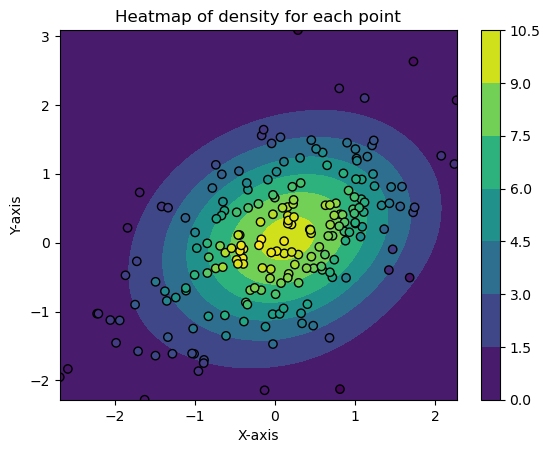

In [308]:

train_data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=500)
test_data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=200)
cl=KDE('gaussian')
cl.fit(train_data)
densities=cl.score_samples(test_data)
print(densities)
cl.visualise(test_data,densities)